In [1]:
import math
import sys
sys.path.append('/Users/vikaspandey/my_projects/deeplearning_ai')
from utils.utils import load_data_from_csv_as_np, convert_to_one_hot
from data_visualisation.plot.utils import show_image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from sklearn.model_selection import train_test_split

%matplotlib inline
np.random.seed(2)

random_seed = 2


array([2, 3, 1, 0])

In [2]:
def random_mini_batches(X, Y, mini_batch_size=64, seed=0):
    m = X.shape[0]
    np.random.seed(seed)
    permutation = np.random.permutation(m)
    shuffled_X = X[permutation]
    shuffled_Y = Y[permutation]
    mini_batches = []
    number_of_mini_batches = math.floor(
        m/mini_batch_size
    )
    for b in range(0, number_of_mini_batches):
        mini_batch_X = shuffled_X[b*mini_batch_size:(b+1)*mini_batch_size]
        mini_batch_Y = shuffled_Y[b*mini_batch_size:(b+1)*mini_batch_size]
        mini_batches.append((mini_batch_X, mini_batch_Y))
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[number_of_mini_batches*mini_batch_size:m]
        mini_batch_Y = shuffled_Y[number_of_mini_batches*mini_batch_size:m]
        mini_batches.append((mini_batch_X, mini_batch_Y))
    return mini_batches

In [3]:
train_X_orig,train_Y_orig, test_data_orig = load_data_from_csv_as_np(1, dir="digit_recognizer", dtype='int')

In [4]:
train_X, val_X, train_Y, val_Y = train_test_split(train_X_orig, train_Y_orig, test_size=0.1, random_state=2)

number of training examples = 37800
number of test examples = 4200
X_train shape: (37800, 28, 28, 1)
Y_train shape: (37800, 10)
X_validation shape: (4200, 28, 28, 1)
Y_validation shape: (4200, 10)


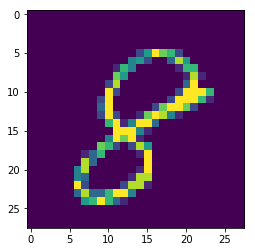

In [5]:
train_X = train_X/255.
val_X = val_X/255.
X_train = train_X.reshape(-1, 28, 28, 1)
show_image(X_train[0][:,:,0])
X_val = val_X.reshape(-1, 28, 28, 1)
(m, nH, nW, nC) = X_train.shape
Y_train = train_Y.reshape((1, -1))
Y_train = convert_to_one_hot(Y_train, 10).T
Y_val = val_Y.reshape((1, -1))
Y_val = convert_to_one_hot(Y_val, 10).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_val.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_validation shape: " + str(X_val.shape))
print("Y_validation shape: " + str(Y_val.shape))


In [6]:
def create_placeholders(nH0, nW0, nC0, nY):
    X = tf.placeholder(tf.float32, shape=[None, nH0, nW0, nC0])
    Y = tf.placeholder(tf.float32, shape=[None, nY])
    return X, Y

In [7]:
X, Y = create_placeholders(28, 28, 1, 10)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("Placeholder:0", shape=(?, 28, 28, 1), dtype=float32)
Y = Tensor("Placeholder_1:0", shape=(?, 10), dtype=float32)


In [8]:
def initialize_parameters():
    tf.set_random_seed(1)
    W1 = tf.get_variable("W1", shape=[5,5,1,32], initializer=tf.contrib.layers.xavier_initializer(seed = 0))
    W2 = tf.get_variable("W2", shape=[5,5,32,32], initializer=tf.contrib.layers.xavier_initializer(seed = 0))
    W3 = tf.get_variable("W3", shape=[3,3,32,64], initializer=tf.contrib.layers.xavier_initializer(seed = 0))
    W4 = tf.get_variable("W4", shape=[3,3,64,64], initializer=tf.contrib.layers.xavier_initializer(seed = 0))
    
    return {"W1": W1, "W2": W2, "W3": W3, "W4": W4}

In [9]:
tf.reset_default_graph()
with tf.Session() as sess_test:
    parameters = initialize_parameters()
    init = tf.global_variables_initializer()
    sess_test.run(init)
    print("W1 = " + str(parameters["W1"].eval()[1,1]))
    print("W2 = " + str(parameters["W2"].eval()[1,1]))


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.
W1 = [[-0.05074088  0.00199553  0.00414077 -0.04069575 -0.04086844  0.00398856
   0.07175875  0.023808   -0.02326647  0.04586978 -0.08235063  0.00816405
  -0.0385248  -0.02892781  0.00744654  0.07795027 -0.05518249  0.05105729
  -0.05234016  0.04300165 -0.04925928  0.0612269  -0.03208476 -0.05321277
   0.07479723 -0.06783506 -0.05706007 -0.07336373  0.03016851  0.00548052
  -0.04078463 -0.06712879]]
W2 = [[-0.0333078  -0.02541297 -0.028984   ... -0.01601969  0.01680563
   0.03396304]
 [ 0.06053133 -0.04004252  0.02117505 ...  0.05669088  0.0510536
  -0.01937763]
 [-0.05532394 -0.03151083  0.01312445 ... -0.05549609 -0.02698591
  -0.03136879]
 ...
 [ 0.04561144  0.0017501   0.01684076

In [10]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
    W4 = parameters['W4']
    
    Z1 = tf.nn.conv2d(X, W1, strides=[1,1,1,1], padding='SAME')
    A1 = tf.nn.relu(Z1)
    
    Z2 = tf.nn.conv2d(A1, W2, strides=[1,1,1,1], padding="SAME")
    A2 = tf.nn.relu(Z2)
    
    P1 = tf.nn.max_pool(A1, ksize=[1,8,8,1], strides=[1,8,8,1], padding="SAME")
    

    P2 = tf.nn.max_pool(A2, ksize=[1,2,2,1], strides=[1,1,1,1], padding="SAME")
    
    Z3 = tf.nn.conv2d(P2, W3, strides=[1,1,1,1], padding="SAME")
    
    A3 = tf.nn.relu(Z3)
    
    P3 = tf.nn.max_pool(A3, ksize=[1,8,8,1], strides=[1,8,8,1], padding="SAME")
    
    Z4 = tf.nn.conv2d(P3, W4, strides=[1,1,1,1], padding="SAME")
    
    A4 = tf.nn.relu(Z4)
    
    P4 =  tf.nn.max_pool(A4, ksize=[1,8,8,1], strides=[1,8,8,1], padding="SAME")

    F = tf.contrib.layers.flatten(P4)

    Z5 = tf.contrib.layers.fully_connected(F, 10, activation_fn=None)


    return Z5
    
    

In [11]:
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholders(28, 28, 1, 10)
    parameters = initialize_parameters()
    Z5 = forward_propagation(X, parameters)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(Z5, {X: np.random.randn(2,28,28,1), Y: np.random.randn(2,10)})
    print("Z5 = " + str(a))

Instructions for updating:
Use keras.layers.flatten instead.
Z5 = [[-0.00265607  0.01272591 -0.00488362  0.007249   -0.00557353  0.02499341
   0.02684057 -0.00011968  0.04606749 -0.01753299]
 [-0.00494749  0.0091344  -0.00634724  0.00917524 -0.00454434  0.01968112
   0.02276072  0.00158876  0.04476874 -0.02016742]]


In [12]:
def compute_cost(Z5, Y):
    cost = tf.nn.softmax_cross_entropy_with_logits(logits = Z5, labels = Y)
    cost = tf.reduce_mean(cost)
    
    return cost

In [13]:
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholders(28, 28, 1, 10)
    parameters = initialize_parameters()
    Z5 = forward_propagation(X, parameters)
    cost = compute_cost(Z5, Y)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(cost, {X: np.random.randn(4,28,28,1), Y: np.random.randn(4,10)})
    print("cost = " + str(a))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

cost = 5.02672


In [19]:
def plot_costs(costs, learning_rate):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

In [20]:
def model(X_train, Y_train, X_test, Y_test,learning_rate = 0.009,
          num_epochs = 30, minibatch_size = 64, print_cost = True):
    
    ops.reset_default_graph()
    tf.set_random_seed(1)
    seed = 3
    (m, n_H0, n_W0, n_C0) = X_train.shape
    n_y = Y_train.shape[1]
    costs = []                                        
    
    X, Y = create_placeholders(n_H0, n_W0,n_C0, n_y)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(num_epochs):
            minibatch_cost = 0.
            num_minibatches = int(m / minibatch_size) 
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)
            for minibatch in minibatches:
                (minibatch_X, minibatch_Y) = minibatch
                _ , temp_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                minibatch_cost += temp_cost / num_minibatches
                
            if print_cost == True and epoch % 5 == 0:
                print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)
        plot_costs(costs, learning_rate)
        predict_op = tf.argmax(Z3, 1)
        correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print(accuracy)
        train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
        print("Train Accuracy:", train_accuracy)
        print("Test Accuracy:", test_accuracy)
        
        return train_accuracy, test_accuracy, parameters

Cost after epoch 0: 0.375603
Cost after epoch 5: 0.075479
Cost after epoch 10: 0.063437
Cost after epoch 15: 0.047860
Cost after epoch 20: 0.046722
Cost after epoch 25: 0.049995


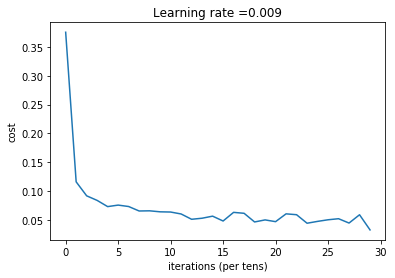

Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy: 0.9876455
Test Accuracy: 0.9759524


In [21]:
test_data_orig = test_data_orig/255.
test_data_orig = test_data_orig.reshape(-1, 28,28,1)
_, _, parameters = model(X_train, Y_train, X_val, Y_val)

In [26]:
graph = parameters['W1'].graph
with tf.Session(graph=graph) as result:
    X = tf.placeholder(tf.float32, shape=[None, 28, 28, 1])
    Z5 = forward_propagation(X, parameters)
    predicted_op = tf.argmax(Z5, 1)
    init = tf.global_variables_initializer()
    result.run(init)
    value = result.run(predicted_op, feed_dict={X: test_data_orig})
    print(value)

[0 8 1 ... 0 1 4]


In [41]:
answers = []
i = 0
for prediction in value:
    i += 1
    answers.append({'ImageId': i, 'Label': prediction})
df = pd.DataFrame(answers)

In [43]:
df.to_csv("result.csv")

In [ ]:
show_image(X_train[0][:,:,0])